In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib
import streamlit as st
import pandas as pd
import folium
from streamlit_folium import st_folium
from IPython.display import display
from scipy.stats import zscore


In [2]:
#read the dataset by pandas
df=pd.read_csv(r"C:\Users\Rana Khalil\Downloads\Sales  (1).csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Returned,Sales,Quantity,Discount,Profit,LAT,LONG
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,Not,250.000,2,0.00,30.0000,36.082762,-114.940200
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,250.000,3,0.00,30.0000,36.082762,-114.940200
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Not,14.620,2,0.00,6.8714,34.052235,-118.253751
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Not,250.000,5,0.45,0.0000,26.067374,-80.124000
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Not,22.368,2,0.20,2.5164,26.067374,-80.124000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furniture,Furnishings,Ultra Door Pull Handle,Not,25.248,3,0.20,4.1028,25.761700,-80.230696
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,Yes,91.960,2,0.00,15.6332,33.703257,-117.923309
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Phones,Aastra 57i VoIP phone,Yes,250.000,2,0.20,19.3932,33.703257,-117.923309
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Yes,29.600,4,0.00,13.3200,33.703257,-117.923309


In [3]:
#display information of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Row ID               9994 non-null   int64  
 1   Order ID             9994 non-null   object 
 2   Order Date           9994 non-null   object 
 3   Ship Date            9994 non-null   object 
 4   Ship Mode            9994 non-null   object 
 5   Customer ID          9994 non-null   object 
 6   Customer Name        9994 non-null   object 
 7   Segment              9994 non-null   object 
 8   Country              9994 non-null   object 
 9   City                 9994 non-null   object 
 10  State                9994 non-null   object 
 11  Postal Code          9994 non-null   int64  
 12  Region               9994 non-null   object 
 13  Retail Sales People  9994 non-null   object 
 14  Product ID           9994 non-null   object 
 15  Category             9994 non-null   o

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Returned,Sales,Quantity,Discount,Profit,LAT,LONG
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,Not,250.000,2,0.00,30.0000,36.082762,-114.940200
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,250.000,3,0.00,30.0000,36.082762,-114.940200
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Not,14.620,2,0.00,6.8714,34.052235,-118.253751
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Not,250.000,5,0.45,0.0000,26.067374,-80.124000
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Not,22.368,2,0.20,2.5164,26.067374,-80.124000


In [5]:
#chech if there is a null value in dataset
df.isnull().sum()

Row ID                 0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Postal Code            0
Region                 0
Retail Sales People    0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Returned               0
Sales                  0
Quantity               0
Discount               0
Profit                 0
LAT                    0
LONG                   0
dtype: int64

In [6]:
#know the number of row and columns in dataset 
df.shape

(9994, 25)

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year


In [8]:
#generate a price column from sales and quanitiy columns
df = df[df['Quantity'] != 0] 
df['Price'] = df['Sales'] / df['Quantity']

In [9]:
#display dataframe 
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Returned,Sales,Quantity,Discount,Profit,LAT,LONG,Order Month,Order Year,Price
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Not,250.000,2,0.00,30.0000,36.082762,-114.940200,8,2016,125.000000
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Not,250.000,3,0.00,30.0000,36.082762,-114.940200,8,2016,83.333333
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Not,14.620,2,0.00,6.8714,34.052235,-118.253751,12,2016,7.310000
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Not,250.000,5,0.45,0.0000,26.067374,-80.124000,11,2015,50.000000
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Not,22.368,2,0.20,2.5164,26.067374,-80.124000,11,2015,11.184000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Not,25.248,3,0.20,4.1028,25.761700,-80.230696,1,2014,8.416000
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Yes,91.960,2,0.00,15.6332,33.703257,-117.923309,2,2017,45.980000
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Yes,250.000,2,0.20,19.3932,33.703257,-117.923309,2,2017,125.000000
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Yes,29.600,4,0.00,13.3200,33.703257,-117.923309,2,2017,7.400000


In [41]:
print(df.duplicated().sum())


0


In [42]:
df.describe()

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit,LAT,LONG,Order Month,Order Year,Price
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-11 07:17:44.078447104,55190.379428,100.381561,3.789574,0.156203,12.867578,37.743512,-94.548318,7.174605,2015.722233,31.518733
min,1.000000,2014-01-02 00:00:00,1040.000000,0.444000,1.000000,0.000000,0.000000,-30.336667,-123.083000,1.000000,2014.000000,0.336000
25%,2499.250000,2015-05-01 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,34.052235,-117.162500,4.000000,2015.000000,5.470000
50%,4997.500000,2016-05-30 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,38.891999,-89.412600,8.000000,2016.000000,16.270000
75%,7495.750000,2017-04-09 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,40.744700,-77.986300,10.000000,2017.000000,48.040000
max,9994.000000,2017-12-30 00:00:00,99301.000000,250.000000,14.000000,0.800000,30.000000,48.756400,-68.196213,12.000000,2017.000000,250.000000
std,2885.163629,NaN,32063.693350,96.122959,2.225110,0.206452,11.910135,5.246393,17.820196,3.428273,1.123555,36.899479


C:\Users\Rana Khalil\AppData\Local\Temp\ipykernel_19764\1517000846.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_score'] = zscore(df['Price'])


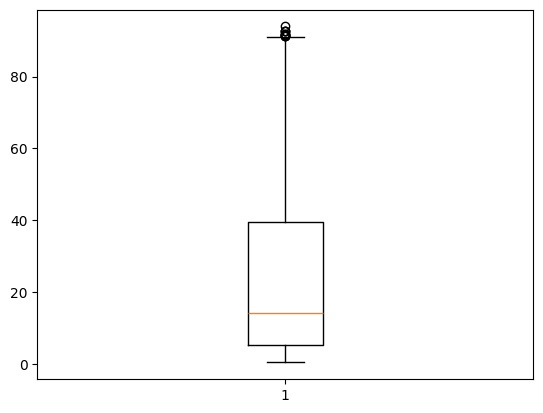

In [15]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]


df['z_score'] = zscore(df['Price'])
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

plt.boxplot(df['Price'])
plt.show()

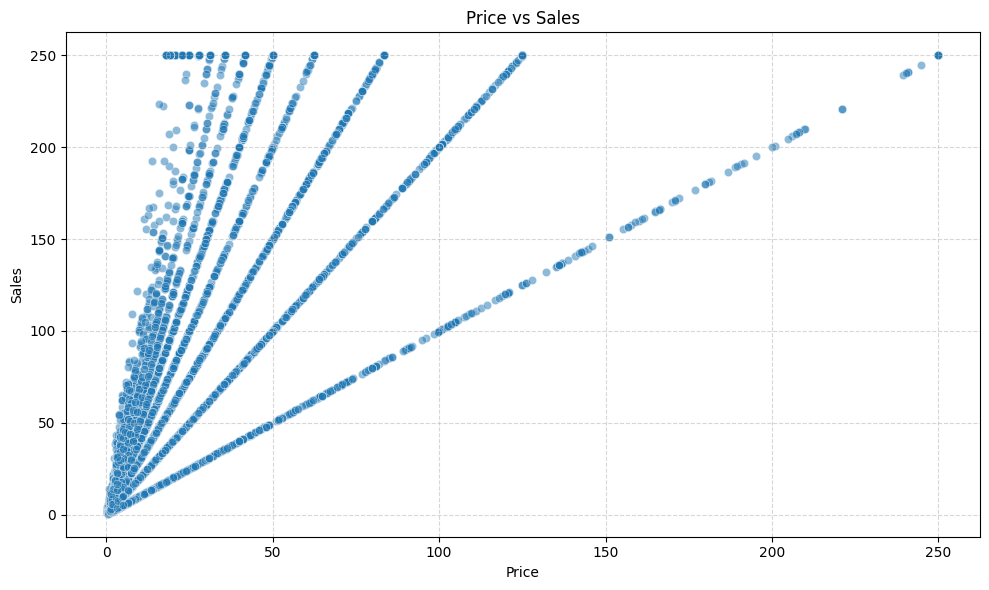

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Sales', alpha=0.5)
plt.title('Price vs Sales')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
df.drop(columns=[
    'Row ID', 'Order ID', 'Customer ID', 'Customer Name',
    'Product ID', 'Product Name', 'Country', 'City',
    'Postal Code', 'Order Date', 'Ship Date', 'Profit'
], inplace=True, errors='ignore')


In [ ]:
df

,Ship Mode,Segment,State,Region,Retail Sales People,Category,Sub-Category,Returned,Sales,Quantity,Discount,LAT,LONG,Order Month,Order Year,Price
0,Second Class,Consumer,Kentucky,South,Cassandra Brandow,Furniture,Bookcases,Not,250.000,2,0.00,36.082762,-114.940200,8,2016,125.000000
1,Second Class,Consumer,Kentucky,South,Cassandra Brandow,Furniture,Chairs,Not,250.000,3,0.00,36.082762,-114.940200,8,2016,83.333333
2,Second Class,Corporate,California,West,Anna Andreadi,Office Supplies,Labels,Not,14.620,2,0.00,34.052235,-118.253751,12,2016,7.310000
3,Standard Class,Consumer,Florida,South,Cassandra Brandow,Furniture,Tables,Not,250.000,5,0.45,26.067374,-80.124000,11,2015,50.000000
4,Standard Class,Consumer,Florida,South,Cassandra Brandow,Office Supplies,Storage,Not,22.368,2,0.20,26.067374,-80.124000,11,2015,11.184000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Florida,South,Cassandra Brandow,Furniture,Furnishings,Not,25.248,3,0.20,25.761700,-80.230696,1,2014,8.416000
9990,Standard Class,Consumer,California,West,Anna Andreadi,Furniture,Furnishings,Yes,91.960,2,0.00,33.703257,-117.923309,2,2017,45.980000
9991,Standard Class,Consumer,California,West,Anna Andreadi,Technology,Phones,Yes,250.000,2,0.20,33.703257,-117.923309,2,2017,125.000000
9992,Standard Class,Consumer,California,West,Anna Andreadi,Office Supplies,Paper,Yes,29.600,4,0.00,33.703257,-117.923309,2,2017,7.400000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ship Mode            9994 non-null   object 
 1   Segment              9994 non-null   object 
 2   State                9994 non-null   object 
 3   Region               9994 non-null   object 
 4   Retail Sales People  9994 non-null   object 
 5   Category             9994 non-null   object 
 6   Sub-Category         9994 non-null   object 
 7   Returned             9994 non-null   object 
 8   Sales                9994 non-null   float64
 9   Quantity             9994 non-null   int64  
 10  Discount             9994 non-null   float64
 11  LAT                  9994 non-null   float64
 12  LONG                 9994 non-null   float64
 13  Order Month          9994 non-null   int32  
 14  Order Year           9994 non-null   int32  
 15  Price                9994 non-null   f

C:\Users\Rana Khalil\AppData\Local\Temp\ipykernel_11596\1045702020.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Sales', estimator=sum, ci=None)


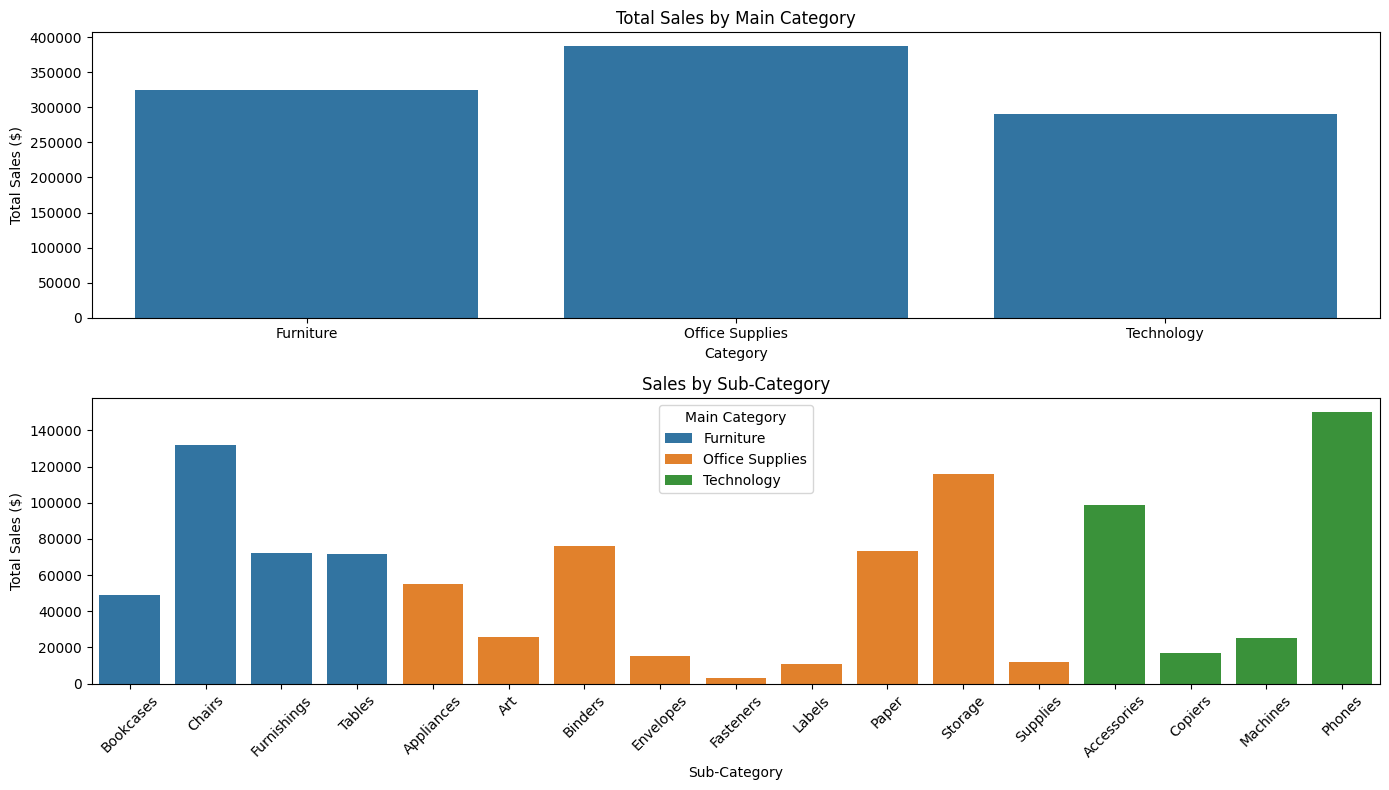

In [ ]:
plt.figure(figsize=(14, 8))

# Top level categories
plt.subplot(2, 1, 1)
sns.barplot(data=df, x='Category', y='Sales', estimator=sum, ci=None)
plt.title('Total Sales by Main Category')
plt.ylabel('Total Sales ($)')

# Drill down to sub-categories
plt.subplot(2, 1, 2)
subcat_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
sns.barplot(data=subcat_sales, x='Sub-Category', y='Sales', hue='Category', dodge=False)
plt.title('Sales by Sub-Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.legend(title='Main Category')

plt.tight_layout()
plt.show()

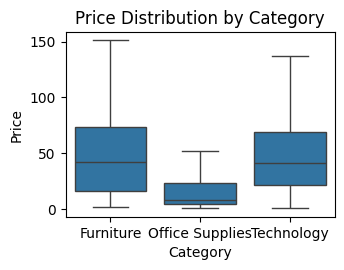

In [ ]:



# Price distribution by category
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Category', y='Price', showfliers=False)
plt.title('Price Distribution by Category')

plt.tight_layout()
plt.show()

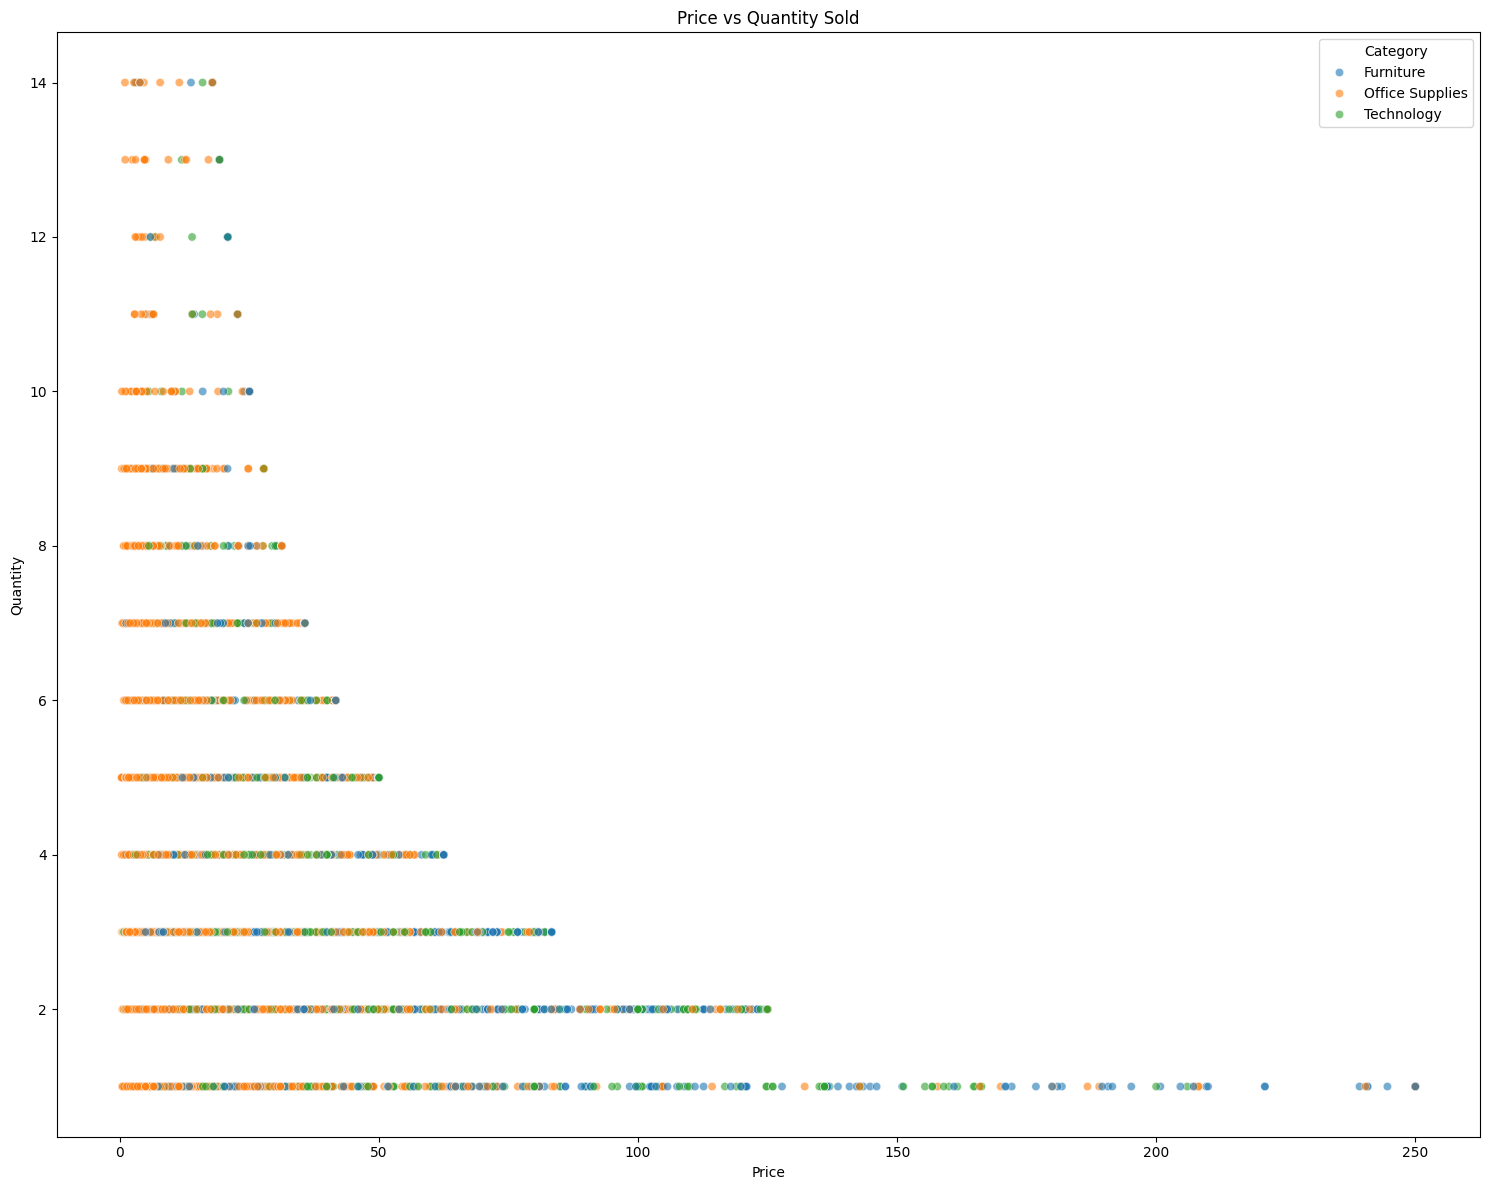

In [ ]:
plt.figure(figsize=(15, 12))
# Quantity vs Price

sns.scatterplot(data=df, x='Price', y='Quantity', hue='Category', alpha=0.6)
plt.title('Price vs Quantity Sold')
plt.tight_layout()
plt.show()



In [47]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,LAT,LONG,Order Month,Order Year,Price,Price_log
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,250.000,2,0.00,30.0000,36.082762,-114.940200,8,2016,125.000000,4.836282
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,250.000,3,0.00,30.0000,36.082762,-114.940200,8,2016,83.333333,4.434777
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.620,2,0.00,6.8714,34.052235,-118.253751,12,2016,7.310000,2.117460
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,250.000,5,0.45,0.0000,26.067374,-80.124000,11,2015,50.000000,3.931826
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.368,2,0.20,2.5164,26.067374,-80.124000,11,2015,11.184000,2.500124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,25.248,3,0.20,4.1028,25.761700,-80.230696,1,2014,8.416000,2.242410
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,91.960,2,0.00,15.6332,33.703257,-117.923309,2,2017,45.980000,3.849722
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,250.000,2,0.20,19.3932,33.703257,-117.923309,2,2017,125.000000,4.836282
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,29.600,4,0.00,13.3200,33.703257,-117.923309,2,2017,7.400000,2.128232


In [ ]:
# Top products
plt.figure(figsize=(15, 12))
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).sort_values()
sns.barplot(x=top_products.values, y=top_products.index, orient='h')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales ($)')

KeyError: 'Product Name'

<Figure size 1500x1200 with 0 Axes>

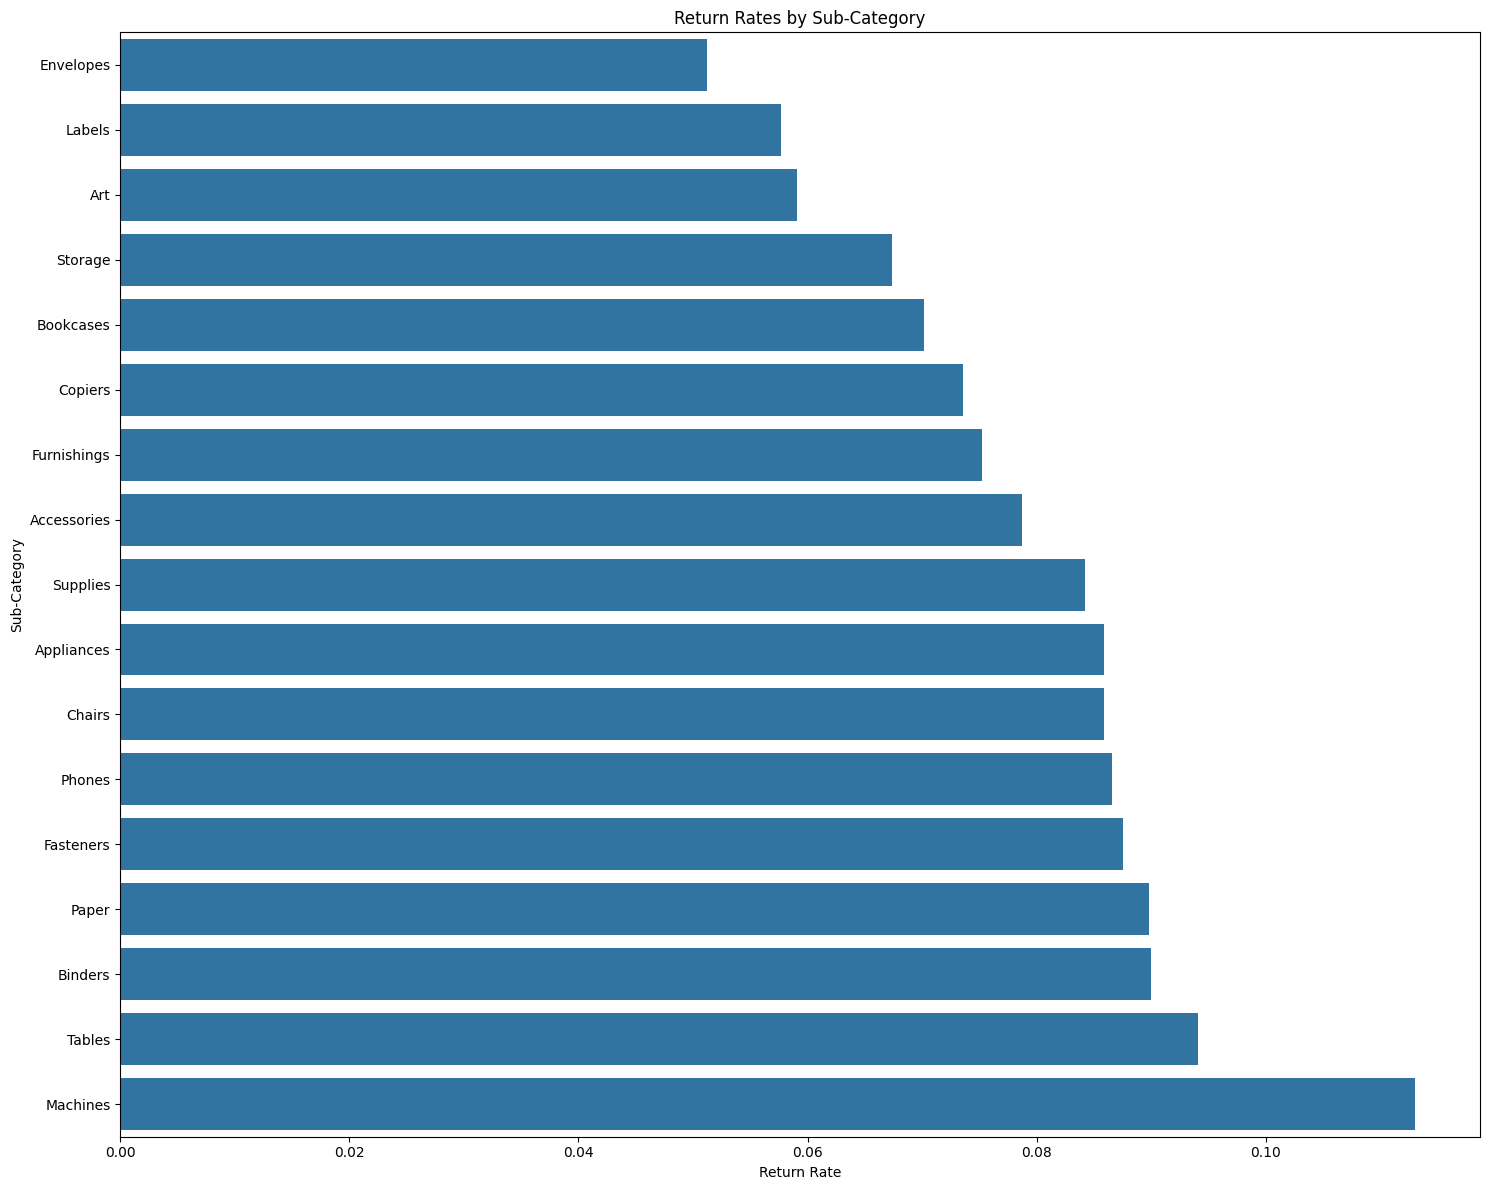

In [ ]:
# First convert Returned to binary (1 for returned, 0 for not returned)
df['Returned_Binary'] = df['Returned'].apply(lambda x: 1 if x == 'Yes' else 0)
plt.figure(figsize=(15, 12))
return_rates = df.groupby('Sub-Category')['Returned_Binary'].mean().sort_values()
sns.barplot(x=return_rates.values, y=return_rates.index, orient='h')
plt.title('Return Rates by Sub-Category')
plt.xlabel('Return Rate')

plt.tight_layout()
plt.show()

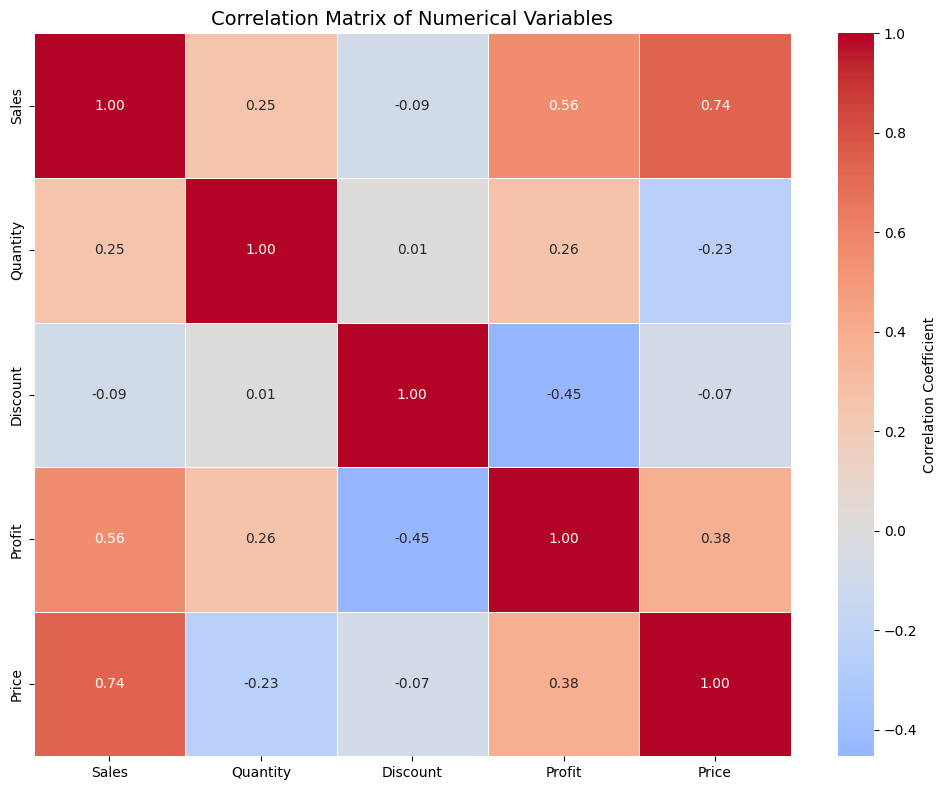

In [ ]:
# Select numerical columns for correlation
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Price']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Variables', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
df

,Order Date,Segment,Country,Category,Sub-Category,Product Name,Returned,Sales,Quantity,Discount,Profit,LAT,LONG,Order Month,Order Year,Price,Returned_Binary
0,2016-08-11,Consumer,United States,Furniture,Bookcases,Bush Somerset Collection Bookcase,Not,250.000,2,0.00,30.0000,36.082762,-114.940200,8,2016,125.000000,0
1,2016-08-11,Consumer,United States,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,250.000,3,0.00,30.0000,36.082762,-114.940200,8,2016,83.333333,0
2,2016-12-06,Corporate,United States,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Not,14.620,2,0.00,6.8714,34.052235,-118.253751,12,2016,7.310000,0
3,2015-11-10,Consumer,United States,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Not,250.000,5,0.45,0.0000,26.067374,-80.124000,11,2015,50.000000,0
4,2015-11-10,Consumer,United States,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Not,22.368,2,0.20,2.5164,26.067374,-80.124000,11,2015,11.184000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,Consumer,United States,Furniture,Furnishings,Ultra Door Pull Handle,Not,25.248,3,0.20,4.1028,25.761700,-80.230696,1,2014,8.416000,0
9990,2017-02-26,Consumer,United States,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,Yes,91.960,2,0.00,15.6332,33.703257,-117.923309,2,2017,45.980000,1
9991,2017-02-26,Consumer,United States,Technology,Phones,Aastra 57i VoIP phone,Yes,250.000,2,0.20,19.3932,33.703257,-117.923309,2,2017,125.000000,1
9992,2017-02-26,Consumer,United States,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Yes,29.600,4,0.00,13.3200,33.703257,-117.923309,2,2017,7.400000,1


In [ ]:
# Check your features
print(df.dtypes)  # See if anything isn't numeric

# Optionally, print unique values from non-numeric columns
# print(X['your_column'].unique())


Order Date         datetime64[ns]
Segment                    object
Country                    object
Category                   object
Sub-Category               object
Product Name               object
Returned                   object
Sales                     float64
Quantity                    int64
Discount                  float64
Profit                    float64
LAT                       float64
LONG                      float64
Order Month                 int32
Order Year                  int32
Price                     float64
Returned_Binary             int64
dtype: object


In [ ]:
# Create dummy variables for Category and Sub-Category
category_dummies = pd.get_dummies(df['Category'], drop_first=True,dtype=int)
subcat_dummies = pd.get_dummies(df['Sub-Category'], drop_first=True,dtype=int)

In [ ]:
# Combine with the main data
df = pd.concat([df, category_dummies, subcat_dummies], axis=1)

In [ ]:
# Drop original Category and Sub-Category
df= df.drop(['Category', 'Sub-Category'], axis=1)

In [ ]:
df

,Order Date,Segment,Country,Product Name,Returned,Sales,Quantity,Discount,Profit,LAT,...,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,2016-08-11,Consumer,United States,Bush Somerset Collection Bookcase,Not,250.000,2,0.00,30.0000,36.082762,...,0,0,0,0,0,0,0,0,0,0
1,2016-08-11,Consumer,United States,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,250.000,3,0.00,30.0000,36.082762,...,0,0,0,0,0,0,0,0,0,0
2,2016-12-06,Corporate,United States,Self-Adhesive Address Labels for Typewriters b...,Not,14.620,2,0.00,6.8714,34.052235,...,0,0,0,1,0,0,0,0,0,0
3,2015-11-10,Consumer,United States,Bretford CR4500 Series Slim Rectangular Table,Not,250.000,5,0.45,0.0000,26.067374,...,0,0,0,0,0,0,0,0,0,1
4,2015-11-10,Consumer,United States,Eldon Fold 'N Roll Cart System,Not,22.368,2,0.20,2.5164,26.067374,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,Consumer,United States,Ultra Door Pull Handle,Not,25.248,3,0.20,4.1028,25.761700,...,0,0,1,0,0,0,0,0,0,0
9990,2017-02-26,Consumer,United States,Tenex B1-RE Series Chair Mats for Low Pile Car...,Yes,91.960,2,0.00,15.6332,33.703257,...,0,0,1,0,0,0,0,0,0,0
9991,2017-02-26,Consumer,United States,Aastra 57i VoIP phone,Yes,250.000,2,0.20,19.3932,33.703257,...,0,0,0,0,0,0,1,0,0,0
9992,2017-02-26,Consumer,United States,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Yes,29.600,4,0.00,13.3200,33.703257,...,0,0,0,0,0,1,0,0,0,0


In [ ]:

df_encoded = df.copy()


categorical_cols = ['Segment', 'Country']
dummies = pd.get_dummies(df_encoded[categorical_cols], drop_first=True, dtype=int)


df_encoded.drop(columns=categorical_cols, inplace=True)
df_encoded = pd.concat([df_encoded, dummies], axis=1)


In [ ]:
segment_dummies = pd.get_dummies(df['Segment'], drop_first=True, dtype=int)
country_dummies = pd.get_dummies(df['Country'], drop_first=True, dtype=int)



In [ ]:
df = pd.concat([df, segment_dummies, country_dummies, ], axis=1)


In [ ]:
df.drop(['Segment', 'Country', ], axis=1, inplace=True)


In [ ]:
df

,Order Date,Product Name,Returned,Sales,Quantity,Discount,Profit,LAT,LONG,Order Month,...,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,Corporate,Home Office
0,2016-08-11,Bush Somerset Collection Bookcase,Not,250.000,2,0.00,30.0000,36.082762,-114.940200,8,...,0,0,0,0,0,0,0,0,0,0
1,2016-08-11,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,250.000,3,0.00,30.0000,36.082762,-114.940200,8,...,0,0,0,0,0,0,0,0,0,0
2,2016-12-06,Self-Adhesive Address Labels for Typewriters b...,Not,14.620,2,0.00,6.8714,34.052235,-118.253751,12,...,0,1,0,0,0,0,0,0,1,0
3,2015-11-10,Bretford CR4500 Series Slim Rectangular Table,Not,250.000,5,0.45,0.0000,26.067374,-80.124000,11,...,0,0,0,0,0,0,0,1,0,0
4,2015-11-10,Eldon Fold 'N Roll Cart System,Not,22.368,2,0.20,2.5164,26.067374,-80.124000,11,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,Ultra Door Pull Handle,Not,25.248,3,0.20,4.1028,25.761700,-80.230696,1,...,1,0,0,0,0,0,0,0,0,0
9990,2017-02-26,Tenex B1-RE Series Chair Mats for Low Pile Car...,Yes,91.960,2,0.00,15.6332,33.703257,-117.923309,2,...,1,0,0,0,0,0,0,0,0,0
9991,2017-02-26,Aastra 57i VoIP phone,Yes,250.000,2,0.20,19.3932,33.703257,-117.923309,2,...,0,0,0,0,1,0,0,0,0,0
9992,2017-02-26,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Yes,29.600,4,0.00,13.3200,33.703257,-117.923309,2,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X=df

In [ ]:
print(X.dtypes[X.dtypes == 'object'])


Product Name    object
Returned        object
dtype: object


In [ ]:
print('Segment' in X.columns)


False


In [ ]:
X = X.drop('Returned', axis=1)


In [ ]:
X = X.drop('Product Name', axis=1)


In [ ]:
X=X.drop('Quantity',axis=1)
X=X.drop('Sales',axis=1)

In [ ]:
df['Sales'].describe()

count    9994.000000
mean      100.381561
std        96.122959
min         0.444000
25%        17.280000
50%        54.490000
75%       209.940000
max       250.000000
Name: Sales, dtype: float64

In [ ]:
X['Order Date'] = pd.to_datetime(X['Order Date'])


X['Year'] = X['Order Date'].dt.year
X['Month'] = X['Order Date'].dt.month
X['Day'] = X['Order Date'].dt.day
X = X.drop('Order Date', axis=1)



In [ ]:
X 
y = df['Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [ ]:
joblib.dump(model, 'my_model.pkl')


['my_model.pkl']

In [ ]:
X_train

,Discount,Profit,LAT,LONG,Order Month,Order Year,Price,Returned_Binary,Office Supplies,Technology,...,Paper,Phones,Storage,Supplies,Tables,Corporate,Home Office,Year,Month,Day
4100,0.80,0.0000,29.760400,-95.369803,6,2017,2.264,0,1,0,...,0,0,0,0,0,0,0,2017,6,19
2586,0.00,30.0000,40.712775,-73.981300,6,2017,35.510,0,1,0,...,0,0,1,0,0,0,0,2017,6,30
9194,0.20,3.5994,33.495120,-112.145554,11,2014,6.856,0,1,0,...,0,0,0,1,0,0,0,2014,11,30
2002,0.00,9.5940,38.252945,-85.638066,12,2017,31.980,0,1,0,...,0,0,1,0,0,0,0,2017,12,25
7225,0.00,10.1640,37.774929,-122.394300,7,2016,7.700,0,0,0,...,0,0,0,0,0,0,0,2016,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.00,8.5544,40.725200,-73.719700,6,2017,12.580,0,0,0,...,0,0,0,0,0,1,0,2017,6,29
5191,0.00,11.5800,37.774929,-122.394300,5,2017,11.580,0,1,0,...,0,0,0,0,0,0,0,2017,5,5
5390,0.20,9.5526,47.606200,-122.333300,10,2017,8.784,0,1,0,...,0,0,0,0,0,1,0,2017,10,11
860,0.00,0.1472,37.774929,-122.394300,9,2014,3.680,0,1,0,...,0,0,0,1,0,0,0,2014,9,6


In [ ]:
y_test

3125    250.000
1441     36.672
4510     37.300
39      212.058
4509    171.288
         ...   
9956     46.350
1561      2.780
1670     16.680
6951    250.000
3910    250.000
Name: Sales, Length: 1999, dtype: float64

In [ ]:
X_test

,Discount,Profit,LAT,LONG,Order Month,Order Year,Price,Returned_Binary,Office Supplies,Technology,...,Paper,Phones,Storage,Supplies,Tables,Corporate,Home Office,Year,Month,Day
3125,0.2,21.1428,28.039700,-81.479096,11,2015,62.500,0,1,0,...,0,0,1,0,0,1,0,2015,11,6
1441,0.2,11.4600,37.774929,-122.394300,12,2017,18.336,0,1,0,...,0,0,0,0,0,0,0,2017,12,19
4510,0.0,17.1580,42.096144,-89.640664,10,2016,18.650,0,0,0,...,0,0,0,0,0,1,0,2016,10,11
39,0.3,0.0000,29.760400,-95.369803,12,2015,70.686,0,0,0,...,0,0,0,0,0,0,1,2015,12,27
4509,0.2,0.0000,34.052235,-118.253751,5,2017,57.096,1,0,0,...,0,0,0,0,1,0,0,2017,5,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9956,0.0,21.7845,40.916309,-73.793189,11,2014,9.270,1,1,0,...,1,0,0,0,0,0,1,2014,11,11
1561,0.0,0.7228,47.606200,-122.333300,5,2017,2.780,0,1,0,...,0,0,0,0,0,0,1,2017,5,9
1670,0.2,5.2125,29.760400,-95.369803,10,2017,5.560,0,0,1,...,0,1,0,0,0,0,0,2017,10,19
6951,0.4,30.0000,32.776667,-96.796800,11,2015,125.000,0,0,1,...,0,0,0,0,0,1,0,2015,11,20


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


MAE: 13.89
MSE: 714.61
RMSE: 26.73
R2 Score: 0.92


In [ ]:

columns_to_clean = ['Quantity', 'Discount', 'Price', 'Sales']

for col in columns_to_clean:
    
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=columns_to_clean, inplace=True)


print(df[columns_to_clean].dtypes)


Quantity      int64
Discount    float64
Price       float64
Sales       float64
dtype: object


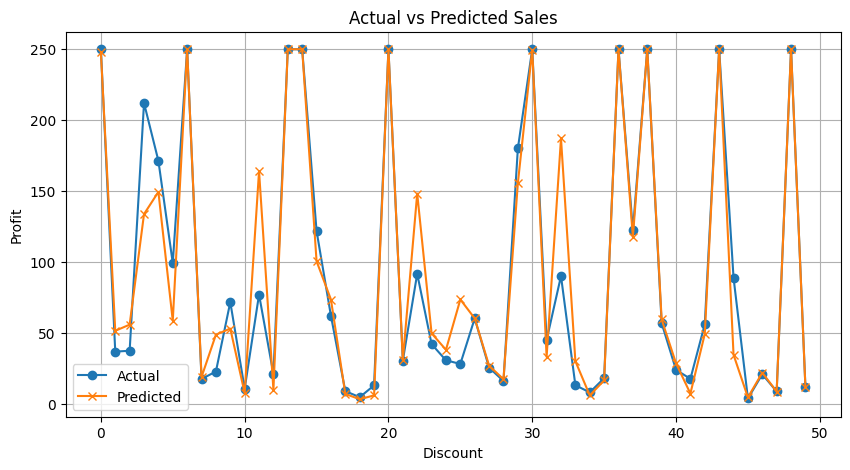

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid()
plt.show()


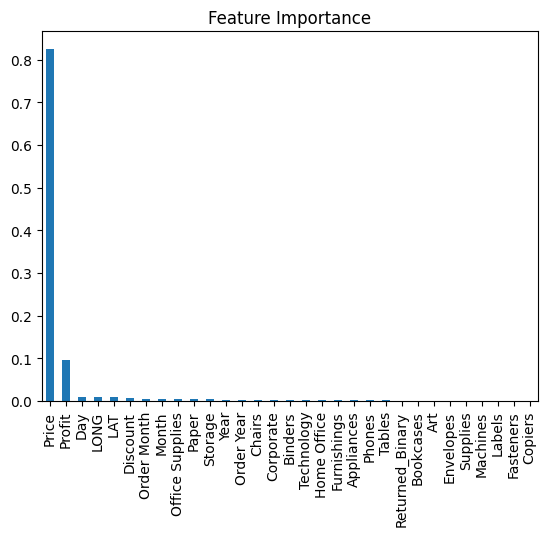

In [ ]:
import pandas as pd

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.show()


In [ ]:
model.score(X_test, y_test)

0.921933721355301